## Renan Oliveira
### Bacharelando em Estatística e Ciência de Dados ICMC - USP

Nesse notebook obtemos 10 mil tweets que contém a hashtag #BBB21, por intermédio da API do Twitter, e contamos quantas vezes os nomes dos participantes aparecem. 

Posteriormente, com essas informações, construímos uma nuvem de palavras. Desse modo, podemos analisar, visualmente, quais participantes estão sendo mais citados na rede social do passarinho.

(Os tweets coletados são do dia 14/02/2021, domingo).

In [1]:
import tweepy
import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Para obter essas chaves acesse o site https://developer.twitter.com/

In [2]:
# chaves de API do Twitter (omiti as minhas chaves)
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

In [3]:
# Validação de tokens de acesso
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
# tweets com a API (por causa do tempo de processamento tomamos 10 mil tweets)
tweets = tweepy.Cursor(api.search,q="#BBB21",
                       lang="pt",
                       since="2021-02-14").items(10000)

In [5]:
# Nomes de todos os participantes (considerando os apelidos de alguns)
names = ['karol', 'carla', 'pocah', 'fiuk', 'projota', 'viih', 'camilla', 'nego di', 'lucas', 'rodolfo',
        'arcrebiano', 'bil', 'microbiano','kerline', 'ker', 'lumena', 'arthur', 'caio', 'joao', 'juliette', 
         'gilberto', 'gil', 'thais', 'sarah']

In [6]:
# vetor que irá conter a frequência de cada nome
num = [0 for i in range(0, len(names))]

for tweet in tweets:
  
  # Obtenho o texto do tweet
  ids = tweet.id
  status = api.get_status(ids, tweet_mode="extended")
  fulltext = status.full_text.lower()
  fulltext = unidecode.unidecode(fulltext)

  # calculo a frequência
  for ind in range(0, len(names)):
    num[ind] = num[ind] + fulltext.count(names[ind])

In [7]:
all_freq = ""
for ind in range(0, len(names)):
    name = names[ind]
    all_freq = all_freq + ((name + " ") * num[ind])

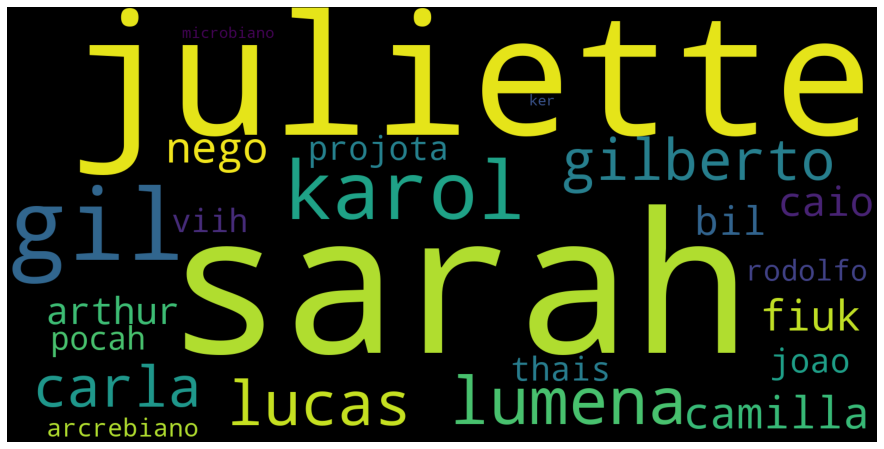

In [8]:
wordcloud = WordCloud(stopwords=['di'],
                      background_color='black', width=1600,                            
                      height=800, max_words=23,
                      collocations=False,
                      prefer_horizontal=True).generate(all_freq)
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')     
ax.set_axis_off()
plt.imshow(wordcloud)          
wordcloud.to_file('result.png',);